# Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_data = {
        "XGLM-564M": {
            "Overall Accuracy": 81.07,
            "Error Type Accuracy": {
                "M": 54.05,
                "W": 81.25,
                "S": 83.25,
                "R": 96.11
            }
        },
        "BLOOM-560m": {
            "Overall Accuracy": 82.37,
            "Error Type Accuracy": {
                "M": 55.86,
                "W": 80.90,
                "S": 84.37,
                "R": 95.22
            }
        },
        "Qwen3-0.6B": {
            "Overall Accuracy": 79.07,
            "Error Type Accuracy": {
                "M": 51.89,
                "W": 72.03,
                "S": 81.87,
                "R": 93.41
            }
        }
    }

# Plotting

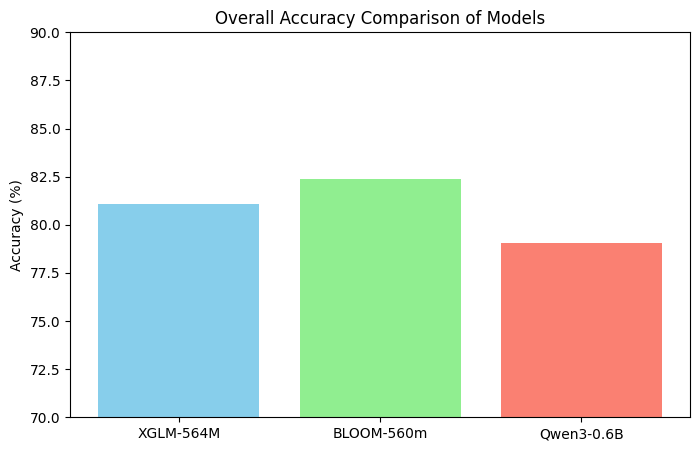

In [ ]:
# Overall accuracy
models = list(model_data.keys())
overall_accuracies = [model_data[model]["Overall Accuracy"] for model in models]

plt.figure(figsize=(8, 5))
plt.bar(models, overall_accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy (%)")
plt.title("Overall Accuracy Comparison of Models")
plt.ylim(70, 90)
plt.show()

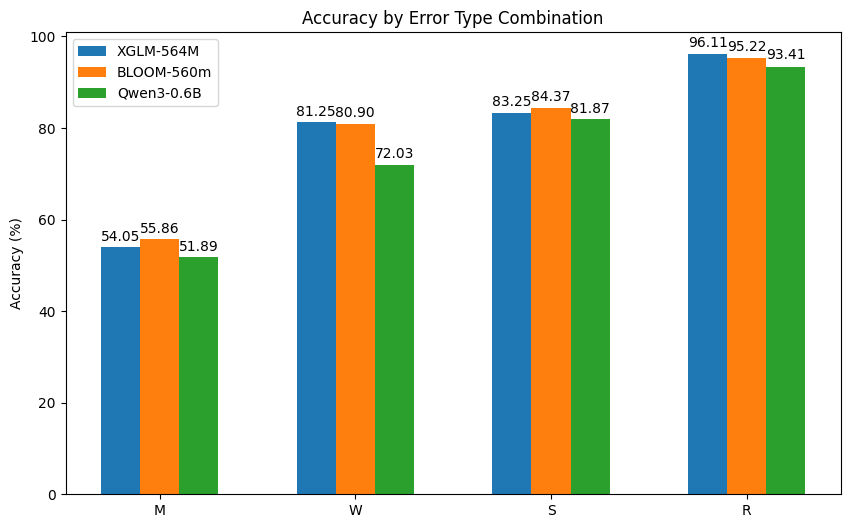

In [ ]:
# Accuracy by error type
error_types = list(model_data[models[0]]["Error Type Accuracy"].keys())
x = np.arange(len(error_types))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

# Define the full labels
full_error_type_labels = {
    "R": "Redundant words",
    "M": ",issing words",
    "S": "Word selection errors",
    "W": "Word ordering errors"

for i, model in enumerate(models):
    type_accuracies = [model_data[model]["Error Type Accuracy"][error_type] for error_type in error_types]
    rects = ax.bar(x + i * bar_width, type_accuracies, bar_width, label=model)

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%.2f' % height, ha='center', va='bottom')


    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Accuracy by Error Type Combination")
    ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
    ax.set_xticklabels([full_error_type_labels[et] for et in error_types])
    ax.legend()

plt.show()

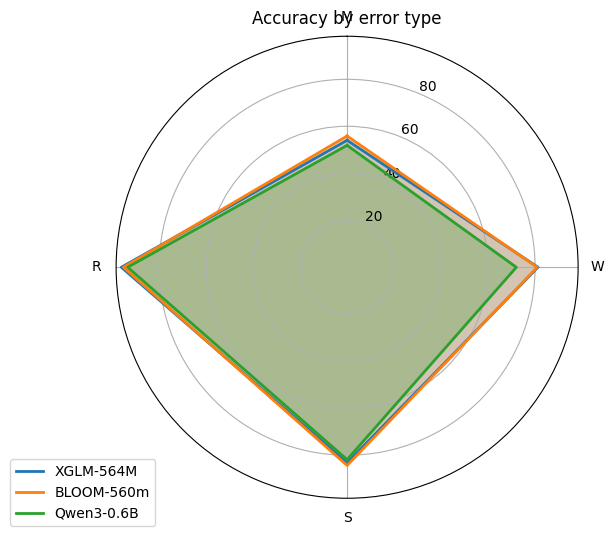

In [ ]:
error_types = list(model_data[list(model_data.keys())[0]]["Error Type Accuracy"].keys())
models = list(model_data.keys())

num_vars = len(error_types)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for model in models:
    values = [model_data[model]["Error Type Accuracy"][error_type] for error_type in error_types]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), error_types)
ax.set_title("Accuracy by error type", va='bottom')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()